In [1]:
using Printf, LinearAlgebra
using JLD2, CairoMakie

using MyTwoLayerNN

In [2]:
set_theme!(theme_latexfonts()) # Theme for plots 
update_theme!(Theme(fontsize = 36)) # 18 for testing and 36 for report
MYORANGE = Makie.RGB(213/255, 94/255, 0/255)

In [3]:
# Path to the folder where the data is stored
DATA_FOLDER = "C:\\Users\\20212202\\Documents\\BEP\\Julia code - Github\\data"

"C:\\Users\\20212202\\Documents\\BEP\\Julia code - Github\\data"

## Phase diagram

**Select data source**

Change the parameter `γ` and `γ′` to the desired values. See folder for available values.

In [25]:
γ = 1.5
γ′ = 0.0

data = load(joinpath(DATA_FOLDER, "phase diagram", "run g=$γ gp=$γ′.jld2")) # Default data

td = data["trainingData"]
nn = data["trainedNN"]
inn = data["initNN"]

# Flatten data and get y data
xdata = td.x |> Iterators.flatten |> collect
ydata = td.y

4-element Vector{Float64}:
 0.25
 0.03333333333333333
 0.03333333333333333
 0.25

### Create simple line plot

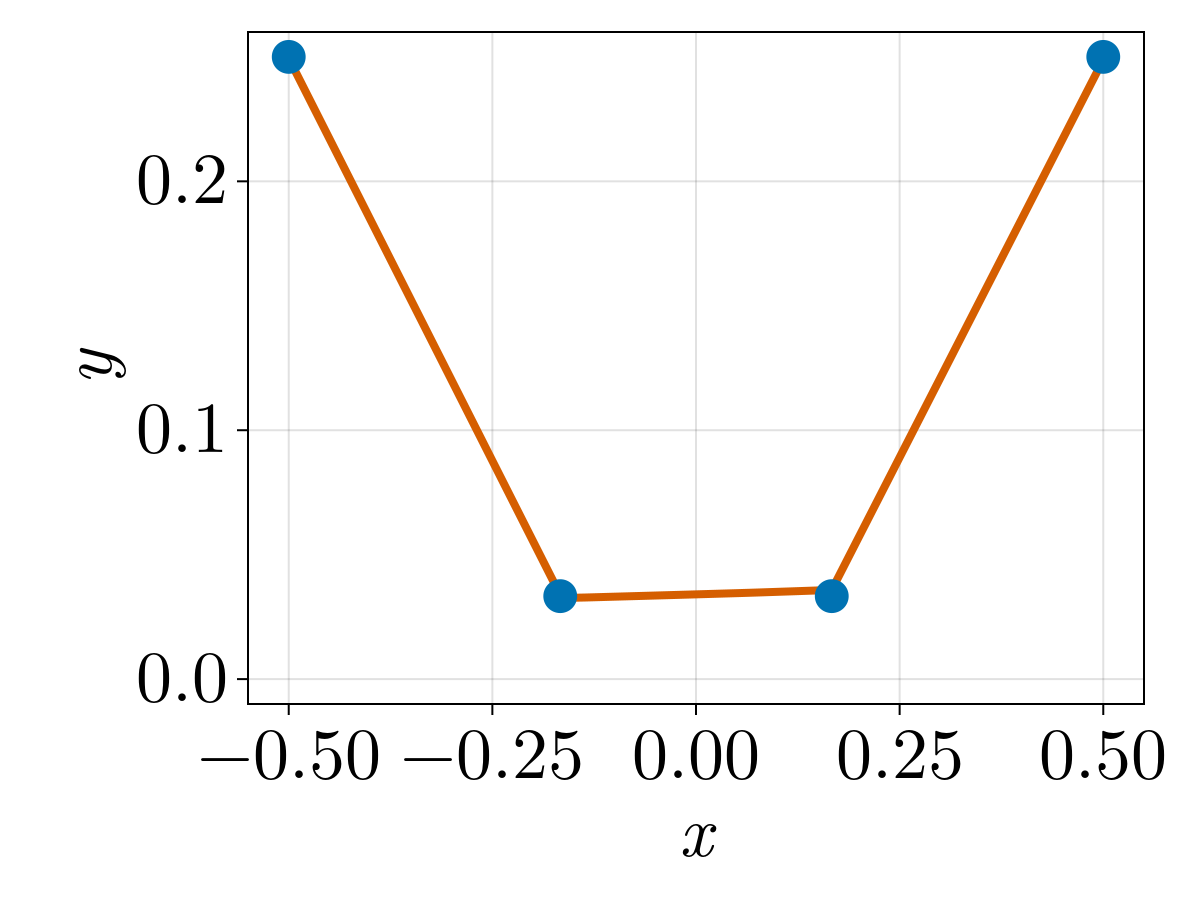

In [58]:
f = Figure()

ax = Axis(f[1, 1], xlabel = L"x", ylabel = L"y", xticks = -0.5:0.25:0.5) # , yticks = [0.0, 0.1, 0.2]

# Draw NN graph
xgrid = range(-0.5, 0.5, length = 100)
lines!(ax, xgrid, [forward(nn, p) for p in xgrid]; color=MYORANGE, linewidth=4)

# Scatter data points
scatter!(ax, xdata, ydata; markersize = 24)

# Some more settings
xlims!(ax, -0.5 * 1.1, 0.5 * 1.1)
# ylims!(ax, -0.01, 0.26)

colsize!(f.layout, 1, Aspect(1, 4/3))

f

In [59]:
save("line g=1.5 gp=0.0.pdf", f)

CairoMakie.Screen{PDF}


## Leaky ReLU

**Select data source**

Change the parameter `leakyconstant` to the desired leaky ReLU constant. See folder for available values.

In [22]:
# Select the data source.
leakyconstant = "0.0"

# Load the data
data = load(joinpath(DATA_FOLDER, "leaky relu", "run c=$leakyconstant.jld2")) # Default data

td = data["trainingData"]
nn = data["trainedNN"]
inn = data["initNN"]

# Flatten x data and get y data
xdata = td.x |> Iterators.flatten |> collect
ydata = td.y

4-element Vector{Float64}:
 0.25
 0.03333333333333333
 0.03333333333333333
 0.25

### Create simple line plot

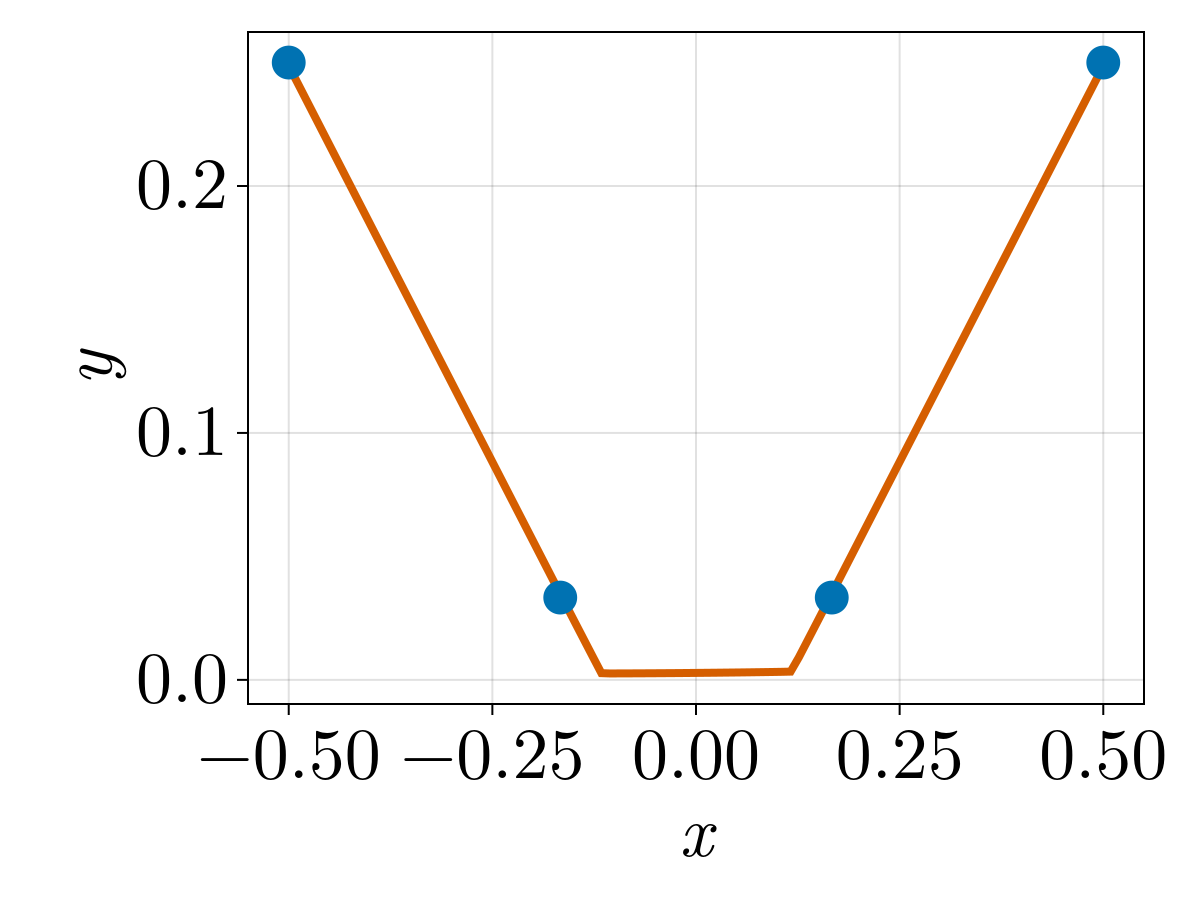

In [12]:
f = Figure()

ax = Axis(f[1, 1], xlabel = L"x", ylabel = L"y", xticks = -0.5:0.25:0.5)

# Draw NN graph
xgrid = range(-0.5, 0.5, length = 100)
lines!(ax, xgrid, [forward(nn, p) for p in xgrid]; color=MYORANGE, linewidth=4)

# Scatter data points
scatter!(ax, xdata, ydata; markersize = 24)

# Some more settings
xlims!(ax, -0.5 * 1.1, 0.5 * 1.1)

colsize!(f.layout, 1, Aspect(1, 4/3))

f

In [251]:
save("line c=$leakyconstant.pdf", f)

CairoMakie.Screen{PDF}


### Create (w, b)-plot of location of neurons

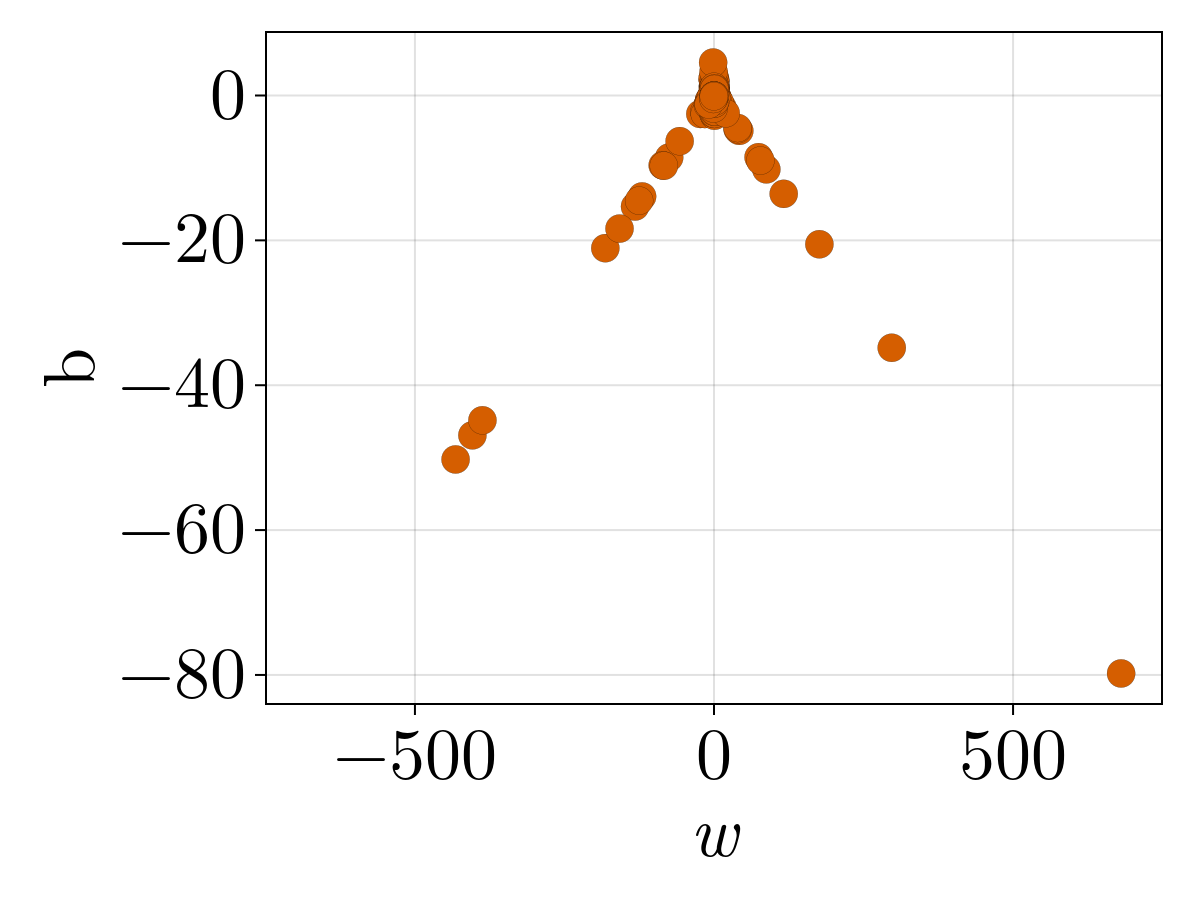

In [252]:
g = Figure()

ax = Axis(g[1, 1], xlabel=L"w", ylabel="b")

# Plot the inflection points
xcoords = vec(@. - nn.b / nn.w)
ycoords = vec(@. abs(nn.a) * sqrt.(nn.b^2 + nn.w^2))

# scatter!(ax, xcoords, ycoords)
scatter!(ax, vec(nn.w), nn.b; markersize=20, strokewidth=0.1, color=MYORANGE)

# Some more settings 
xlims!(ax, -749, 749) # c=0.0
# xlims!(ax, -460 * 1.1, 460 * 1.1) # c=0.5
# xlims!(ax, -2500 * 1.75, 2500 * 1.75) # c=0.99

colsize!(g.layout, 1, Aspect(1, 4/3))

g

In [253]:
save("scat c=$leakyconstant.pdf", g)

CairoMakie.Screen{PDF}


## Repeated data

**Select data source**

Change the parameter `leakyconstant` to the desired constant. See folder for available values.

The `SmoothLeakyReLU` activation function is used.

In [37]:
# Select the data source.
leakyconstant = "0.95"

# Load the data
data = load(joinpath(DATA_FOLDER, "repeated data", "run c=$leakyconstant.jld2")) # Default data

td = data["trainingData"]
nn = data["trainedNN"]
inn = data["initNN"]

# Flatten x data and get y data
xdata = td.x |> Iterators.flatten |> collect
ydata = td.y
xmin, xmax = extrema(xdata)

(-1.1666666666666667, 1.1666666666666667)

### Create simple line plot

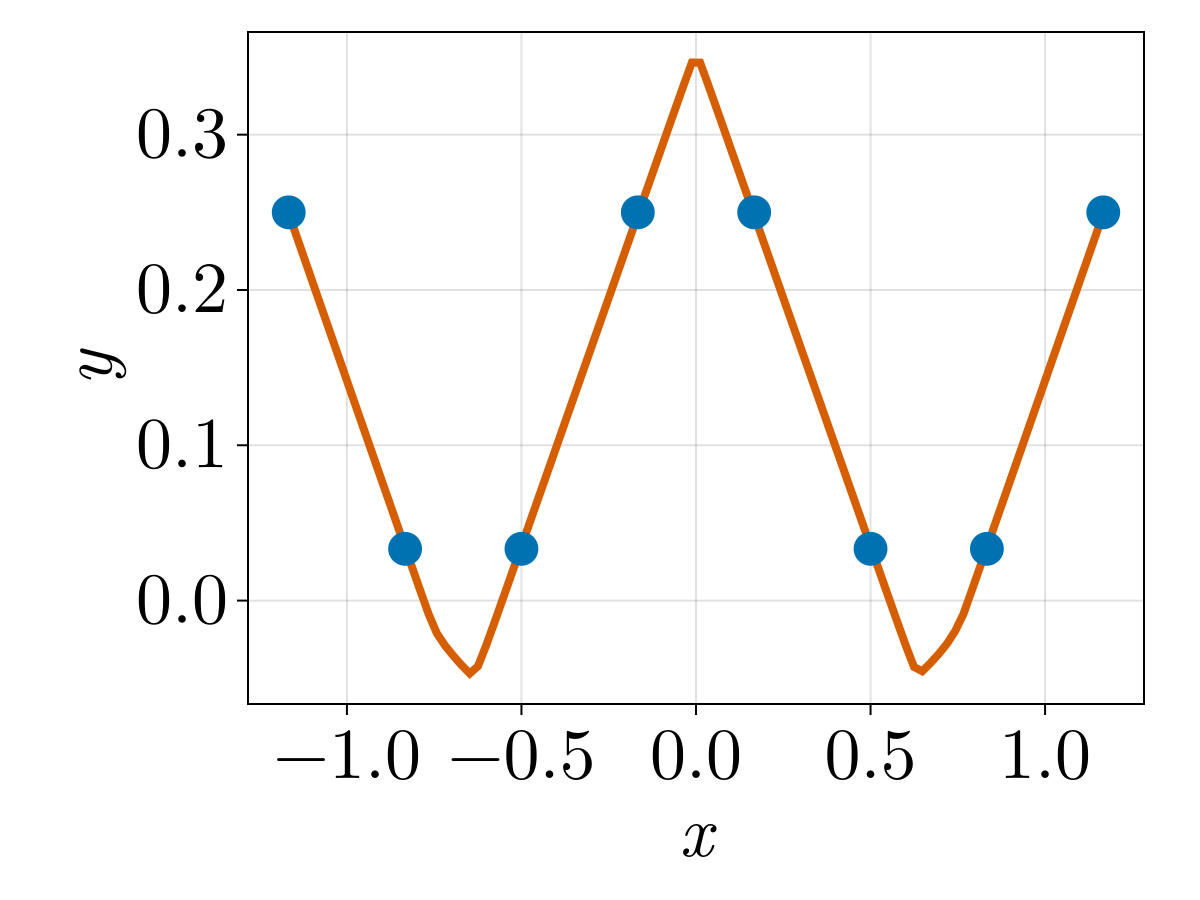

In [38]:
f = Figure()

ax = Axis(f[1, 1], xlabel = L"x", ylabel = L"y")

# Draw NN graph
xgrid = range(xmin, xmax, length = 100)
lines!(ax, xgrid, [forward(nn, p) for p in xgrid]; color=MYORANGE, linewidth=4)

# Scatter data points
scatter!(ax, xdata, ydata; markersize = 24)

# Some more settings
xlims!(ax, xmin * 1.1, xmax * 1.1)

colsize!(f.layout, 1, Aspect(1, 4/3))

f